In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
X = pd.read_csv("students_cleaned.csv")
X

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3,2,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,4,2,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,5,2,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,3,0,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [3]:
X["MathScore"].mean()

66.55994779681973

In [4]:
X["MathScore"].median()

67.0

In [5]:
X["MathScore"].mode()

0    64
Name: MathScore, dtype: int64

In [6]:
X["ReadingScore"].mean()

69.39008139574818

In [7]:
X["ReadingScore"].median()

70.0

In [8]:
X["ReadingScore"].mode()

0    65
Name: ReadingScore, dtype: int64

In [9]:
X["WritingScore"].mean()

68.42933681354535

In [10]:
X["WritingScore"].median()

69.0

In [11]:
X["WritingScore"].mode()

0    67
Name: WritingScore, dtype: int64

In [12]:
X["Gender_female"].mean()

0.5038637222241302

In [13]:
X["Gender_female"].median()

1.0

In [14]:
X["Gender_female"].mode()

0    1.0
Name: Gender_female, dtype: float64

In [15]:
X["Gender_male"].mean()

0.49613627777586977

In [16]:
X["Gender_male"].median()

0.0

In [17]:
X["Gender_male"].mode()

0    0.0
Name: Gender_male, dtype: float64

In [20]:
X["MathScore"].std() / X.MathScore.mean() * 100

23.053282736702542

In [21]:
X["ReadingScore"].std() / X.ReadingScore.mean() * 100

21.271325834740303

In [22]:
X["WritingScore"].std() / X.WritingScore.mean() * 100

22.574844991058495

3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [34]:
from scipy.stats import ttest_ind
math_scores_female = X[X['Gender_female'] == 1]['MathScore']
math_scores_male = X[X['Gender_male'] == 1]['MathScore']
t_stat, p_value = ttest_ind(math_scores_female, math_scores_male, equal_var=False)
alpha = 0.05

print(f"T-Statistic: {t_stat}")
print(f"p: {p_value}")


#p is higher than alpha, reject H0

T-Statistic: -27.709781671935815
p: 7.809675559975291e-167


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [38]:
from scipy.stats import ttest_ind
writing_scores_female = X[X['Gender_female'] == 1]['WritingScore']
writing_scores_male = X[X['Gender_male'] == 1]['WritingScore']
t_stat, p_value = ttest_ind(writing_scores_female, writing_scores_male, equal_var=False)
alpha = 0.05

print(f"T-Statistic: {t_stat}")
print(f"p: {p_value}")

#reject H0

T-Statistic: 52.008547291894
p: 0.0


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [45]:
from scipy.stats import ks_2samp

scores_columns = ['MathScore', 'ReadingScore', 'WritingScore']

for score_column in scores_columns:
    scores_female = X[X['Gender_female'] == 1][score_column]
    scores_male = X[X['Gender_male'] == 1][score_column]
    
    ks_statistic, p_value = ks_2samp(scores_female, scores_male)
print(f"Kolmogorov-Smirnov test: {ks_statistic}")
print(f"p: {p_value}")

Kolmogorov-Smirnov test: 0.23284192974349305
p: 0.0


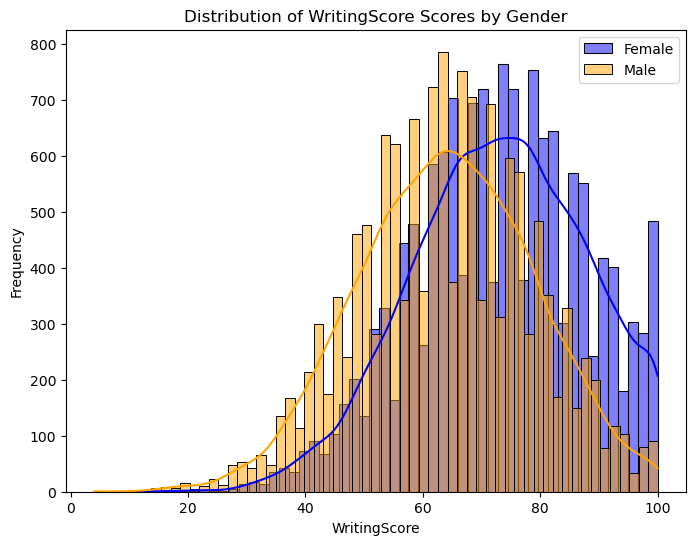

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(scores_female, kde=True, color='blue', label='Female')
sns.histplot(scores_male, kde=True, color='orange', label='Male')
plt.title(f'Distribution of {score_column} Scores by Gender')
plt.legend()
plt.xlabel(score_column)
plt.ylabel('Frequency')
plt.show()